In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sweetviz
from pandas_profiling import ProfileReport

In [148]:
data =pd.read_csv("PHISHING_DATASET.csv")

In [149]:
data.shape

(1786, 21)

In [155]:
data.head(10)

CONTENT_LENGTH  URL_LENGTH CHARACTER_SET  SPECIAL_CHARACTERS  \
0           957.0          21    ISO-8859-1                   7   
1           686.0          21    iso-8859-1                   7   
2           324.0          21      us-ascii                   6   
3         15025.0          21         utf-8                   6   
4           318.0          22    iso-8859-1                   6   
5           224.0          22    iso-8859-1                   6   
6           324.0          22      us-ascii                   7   
7             NaN          22         utf-8                   6   
8          4421.0          22         utf-8                   7   
9             NaN          22         UTF-8                   6   

                                              SERVER URL_IDENTIFICATION  \
0  Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...              A0_71   
1                                              nginx              A0_97   
2                              Microsoft-HTTPAPI/2.0            M0_2303   
3                                              nginx             M0_584   
4                                              nginx            M0_2122   
5                                      Apache/2.2.22            M0_2176   
6                              Microsoft-HTTPAPI/2.0              A0_69   
7                                 openresty/1.11.2.1             M0_161   
8                              Apache/2.4.7 (Ubuntu)             M0_569   
9                                       nginx/1.12.0             M0_601   

          COUNTRY                STATE REGISTRATION_DATE UPDATED_DATE  ...  \
0  United Kingdom                  NaN         16-Jul-00    04-Jul-15  ...   
1          Russia  Novosibirskaya obl.         25-May-13    23-May-16  ...   
2             NaN                  NaN         09-Aug-99    10-Feb-15  ...   
3             NaN                  NaN               NaN          NaN  ...   
4         America            Tennessee         02-Nov-03    29-Jun-15  ...   
5             NaN                  NaN         12-Aug-08    13-Jul-16  ...   
6         America                   CO         15-Sep-13    25-Feb-17  ...   
7         America                   CA         03-Jul-99    07-Aug-15  ...   
8       Australia                   Vi         21-May-09    15-May-16  ...   
9         America                   FL         01-Aug-02    22-Mar-16  ...   

   PORTS_DETECTED  REMOTE_IP  BYTES_TRANSFERRED  REMOTE_APP_PACKETS  \
0               0          1                717                  10   
1               0          2                603                   9   
2               7          3                618                   9   
3               1          5               1099                  17   
4               6          6                696                  10   
5               3          2                420                   6   
6               0          4                850                   9   
7              29          6               3833                  42   
8               0          2               2259                  12   
9               0          3                650                  10   

   SOURCE_APP_PACKETS  REMOTE_APP_BYTES  SOURCE_APP_BYTES  IP_PACKETS  \
0                  11              1011              1960          11   
1                   8               745              1580           8   
2                   7               618               562           7   
3                  15              1243             15476          15   
4                   8               696               636           8   
5                   4               420               372           4   
6                  11               994              1354          11   
7                  43              4125             22495          43   
8                  16              2559              5165          16   
9                  10               950              1417          1

In [156]:
data.shape

(1786, 21)

In [157]:
data.columns

Index(['CONTENT_LENGTH', 'URL_LENGTH', 'CHARACTER_SET', 'SPECIAL_CHARACTERS',
       'SERVER', 'URL_IDENTIFICATION', 'COUNTRY', 'STATE', 'REGISTRATION_DATE',
       'UPDATED_DATE', 'TCP_PACKETS_EXCHANGE', 'PORTS_DETECTED', 'REMOTE_IP',
       'BYTES_TRANSFERRED', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_BYTES', 'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS',
       'WEBSITE_TYPE'],
      dtype='object')

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CONTENT_LENGTH        973 non-null    float64
 1   URL_LENGTH            1786 non-null   int64  
 2   CHARACTER_SET         1779 non-null   object 
 3   SPECIAL_CHARACTERS    1786 non-null   int64  
 4   SERVER                1610 non-null   object 
 5   URL_IDENTIFICATION    1786 non-null   object 
 6   COUNTRY               1478 non-null   object 
 7   STATE                 1421 non-null   object 
 8   REGISTRATION_DATE     1658 non-null   object 
 9   UPDATED_DATE          1646 non-null   object 
 10  TCP_PACKETS_EXCHANGE  1786 non-null   int64  
 11  PORTS_DETECTED        1786 non-null   int64  
 12  REMOTE_IP             1786 non-null   int64  
 13  BYTES_TRANSFERRED     1786 non-null   int64  
 14  REMOTE_APP_PACKETS    1786 non-null   int64  
 15  SOURCE_APP_PACKETS   

In [159]:
data.nunique()

CONTENT_LENGTH           637
URL_LENGTH               142
CHARACTER_SET              8
SPECIAL_CHARACTERS        31
SERVER                   238
URL_IDENTIFICATION      1781
COUNTRY                   51
STATE                    180
REGISTRATION_DATE        872
UPDATED_DATE             529
TCP_PACKETS_EXCHANGE     103
PORTS_DETECTED            66
REMOTE_IP                 18
BYTES_TRANSFERRED        825
REMOTE_APP_PACKETS       116
SOURCE_APP_PACKETS       113
REMOTE_APP_BYTES         822
SOURCE_APP_BYTES         885
IP_PACKETS               113
DNS_PACKETS               10
WEBSITE_TYPE               2
dtype: int64

In [160]:
data.isna().any()

CONTENT_LENGTH           True
URL_LENGTH              False
CHARACTER_SET            True
SPECIAL_CHARACTERS      False
SERVER                   True
URL_IDENTIFICATION      False
COUNTRY                  True
STATE                    True
REGISTRATION_DATE        True
UPDATED_DATE             True
TCP_PACKETS_EXCHANGE    False
PORTS_DETECTED          False
REMOTE_IP               False
BYTES_TRANSFERRED       False
REMOTE_APP_PACKETS      False
SOURCE_APP_PACKETS      False
REMOTE_APP_BYTES        False
SOURCE_APP_BYTES        False
IP_PACKETS              False
DNS_PACKETS              True
WEBSITE_TYPE            False
dtype: bool

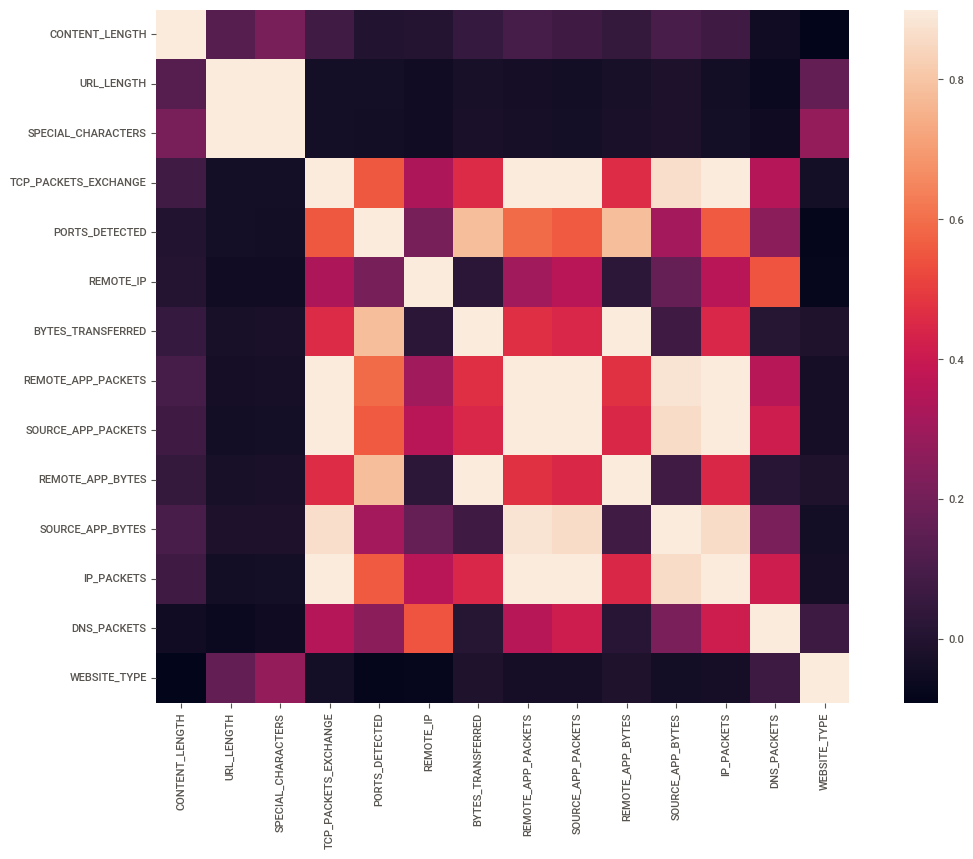

                      CONTENT_LENGTH  URL_LENGTH  SPECIAL_CHARACTERS  \
CONTENT_LENGTH              1.000000    0.130403            0.214591   
URL_LENGTH                  0.130403    1.000000            0.918243   
SPECIAL_CHARACTERS          0.214591    0.918243            1.000000   
TCP_PACKETS_EXCHANGE        0.078639   -0.038168           -0.037286   
PORTS_DETECTED             -0.000349   -0.040108           -0.042900   
REMOTE_IP                   0.004589   -0.047858           -0.048393   
BYTES_TRANSFERRED           0.051436   -0.026284           -0.023789   
REMOTE_APP_PACKETS          0.091265   -0.033549           -0.030438   
SOURCE_APP_PACKETS          0.074359   -0.041960           -0.039869   
REMOTE_APP_BYTES            0.047855   -0.026519           -0.023970   
SOURCE_APP_BYTES            0.100268   -0.014425           -0.014025   
IP_PACKETS                  0.074359   -0.041960           -0.039869   
DNS_PACKETS                -0.045025   -0.067592           -0.04

In [161]:
correlation_metrics = data.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(correlation_metrics,vmax=0.9, square = True) #annot =value
plt.show()
print(correlation_metrics)

In [162]:
data.describe().T

count          mean           std   min    25%     50%  \
CONTENT_LENGTH         973.0  11695.050360  36322.550809   0.0  324.0  1853.0   
URL_LENGTH            1786.0     56.862822     27.579652  16.0   39.0    49.0   
SPECIAL_CHARACTERS    1786.0     11.097984      4.550978   5.0    8.0    10.0   
TCP_PACKETS_EXCHANGE  1786.0     16.256439     40.449744   0.0    0.0     7.0   
PORTS_DETECTED        1786.0      5.479283     21.784606   0.0    0.0     0.0   
REMOTE_IP             1786.0      3.064950      3.384134   0.0    0.0     2.0   
BYTES_TRANSFERRED     1786.0   2977.852184  55972.120457   0.0    0.0   682.0   
REMOTE_APP_PACKETS    1786.0     18.740761     46.338246   0.0    0.0     9.0   
SOURCE_APP_PACKETS    1786.0     18.533595     41.575502   0.0    0.0     8.0   
REMOTE_APP_BYTES      1786.0   3150.951288  55975.332417   0.0    0.0   736.5   
SOURCE_APP_BYTES      1786.0  15870.636618  69766.938099   0.0    0.0   594.0   
IP_PACKETS            1786.0     18.533595     41.575502   0.0    0.0     8.0   
DNS_PACKETS           1785.0      2.261625      2.928025   0.0    0.0     0.0   
WEBSITE_TYPE          1786.0      0.121501      0.326800   0.0    0.0     0.0   

                           75%        max  
CONTENT_LENGTH        11323.00   649263.0  
URL_LENGTH               68.00      249.0  
SPECIAL_CHARACTERS       12.75       43.0  
TCP_PACKETS_EXCHANGE     22.00     1194.0  
PORTS_DETECTED            5.00      708.0  
REMOTE_IP                 5.00       17.0  
BYTES_TRANSFERRED      2327.50  2362906.0  
REMOTE_APP_PACKETS       25.00     1284.0  
SOURCE_APP_PACKETS       26.00     1198.0  
REMOTE_APP_BYTES       2698.50  2362906.0  
SOURCE_APP_BYTES       9809.75  2060012.0  
IP_PACKETS               26.00     1198.0  
DNS_PACKETS               4.00       20.0  
WEBSITE_TYPE              0.00        1.0

In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values=np.nan)
imputer=imputer.fit(df[['CONTENT_LENGTH']])
df[['CONTENT_LENGTH']] = imputer.transform(df[['CONTENT_LENGTH']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

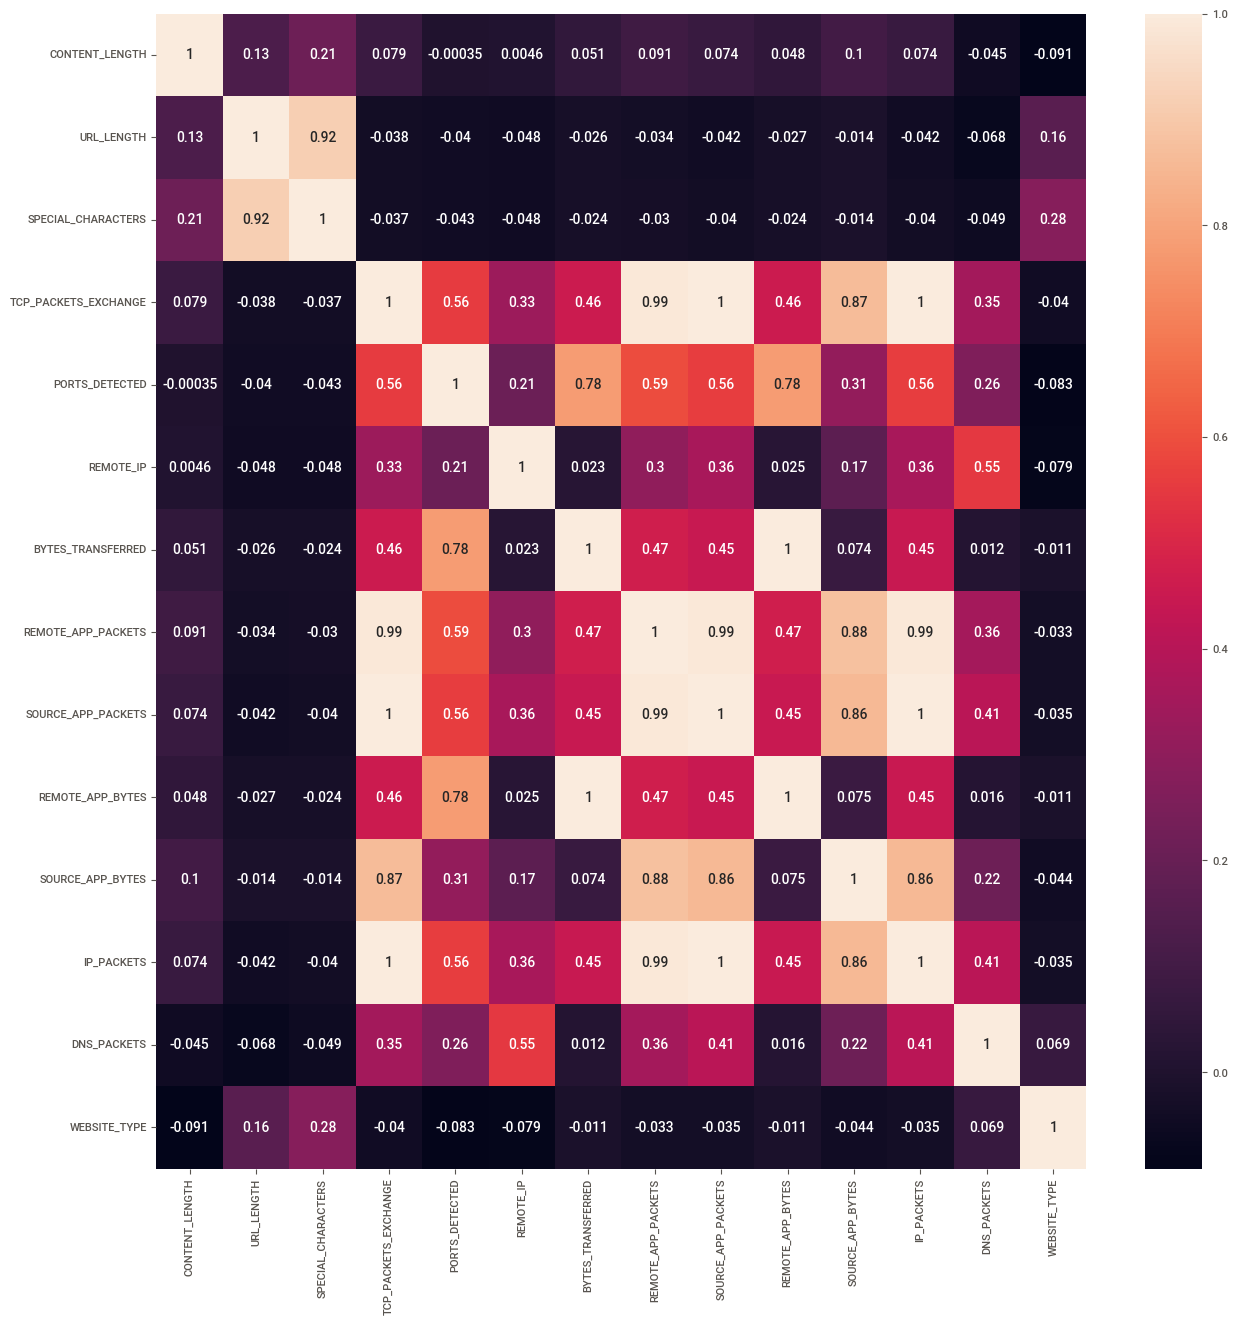

In [164]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

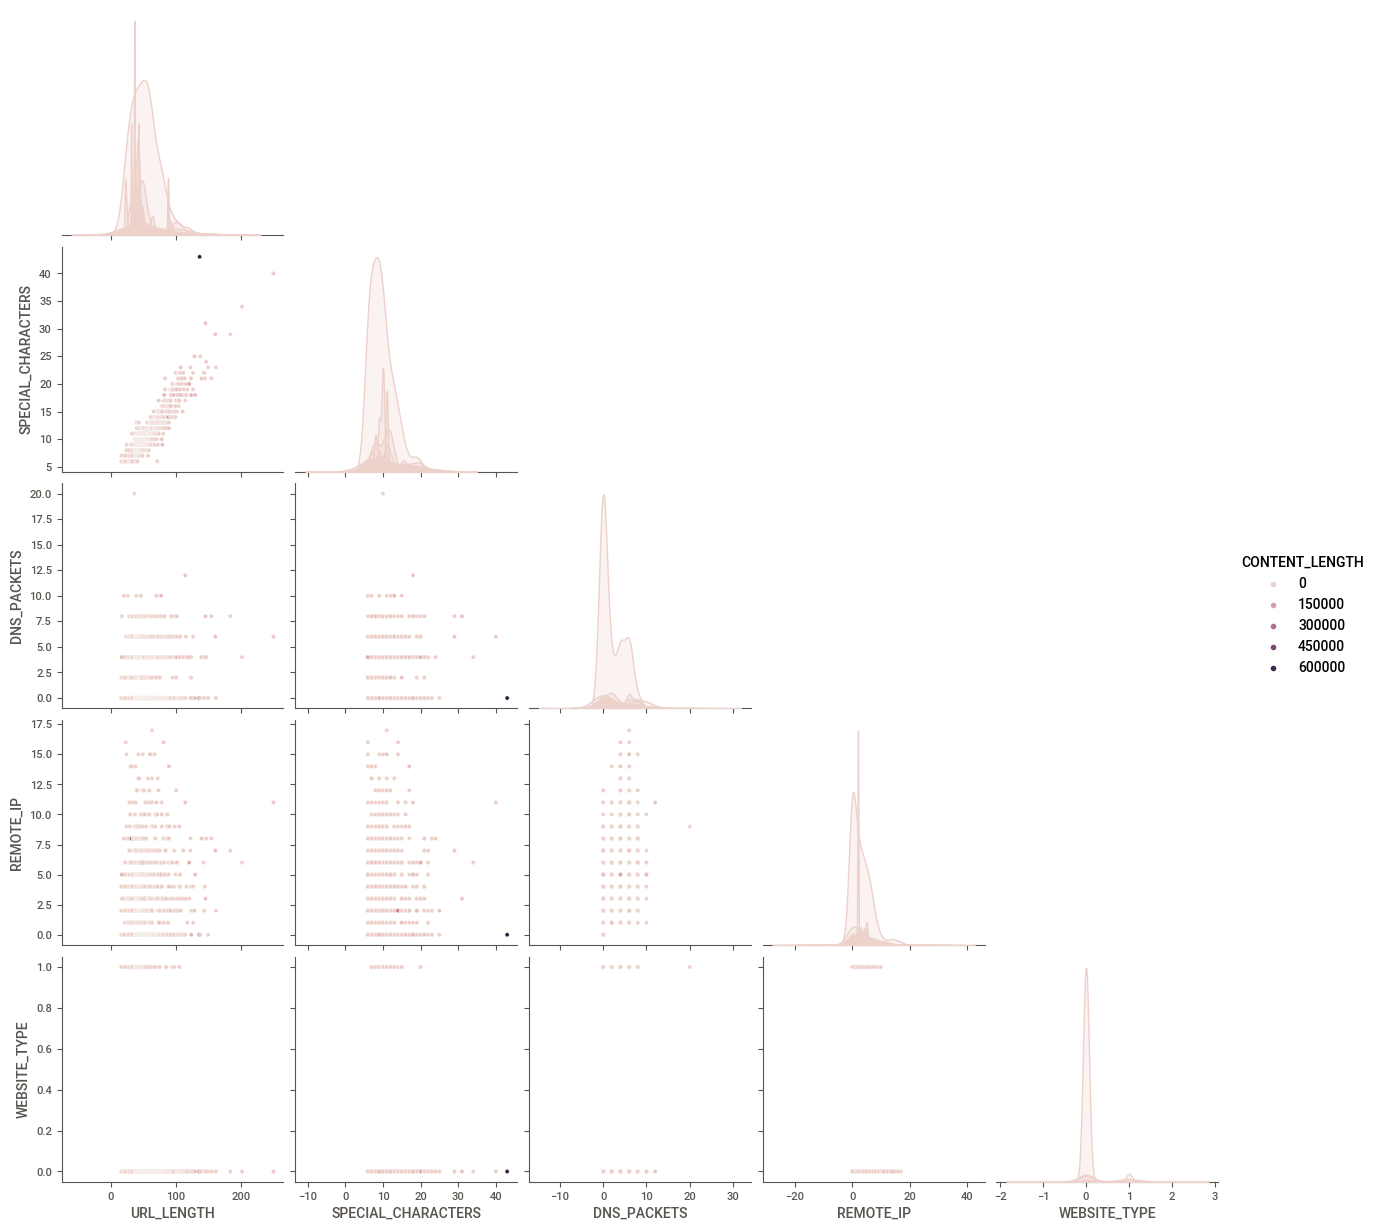

In [165]:
df = data[['URL_LENGTH','SPECIAL_CHARACTERS','CONTENT_LENGTH','DNS_PACKETS' ,'REMOTE_IP','WEBSITE_TYPE']]
sns.pairplot(data = df,hue="CONTENT_LENGTH",corner=True);

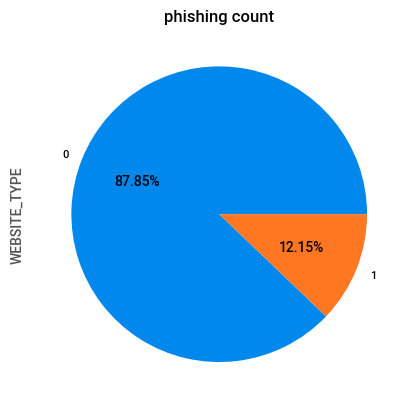

In [166]:
data['WEBSITE_TYPE'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("phishing count")
plt.show()

In [167]:
X = data.drop(['WEBSITE_TYPE'],axis =1)
y = data["WEBSITE_TYPE"]

In [168]:
report = sweetviz.analyze(df,target_feat="WEBSITE_TYPE")

                                             |                                             | [  0%]   00:00 ->…

In [169]:
report.show_html(layout="vertical")

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



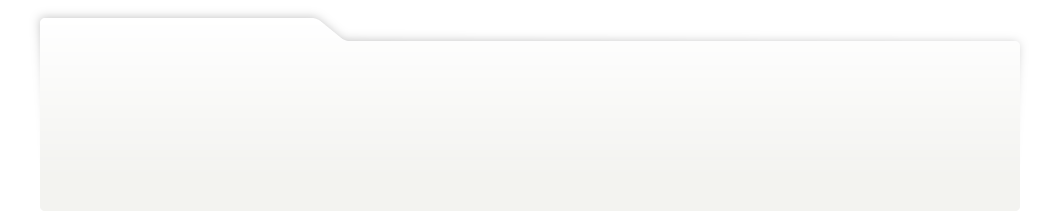
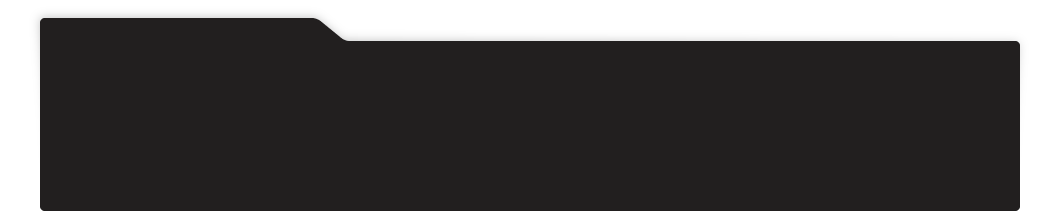
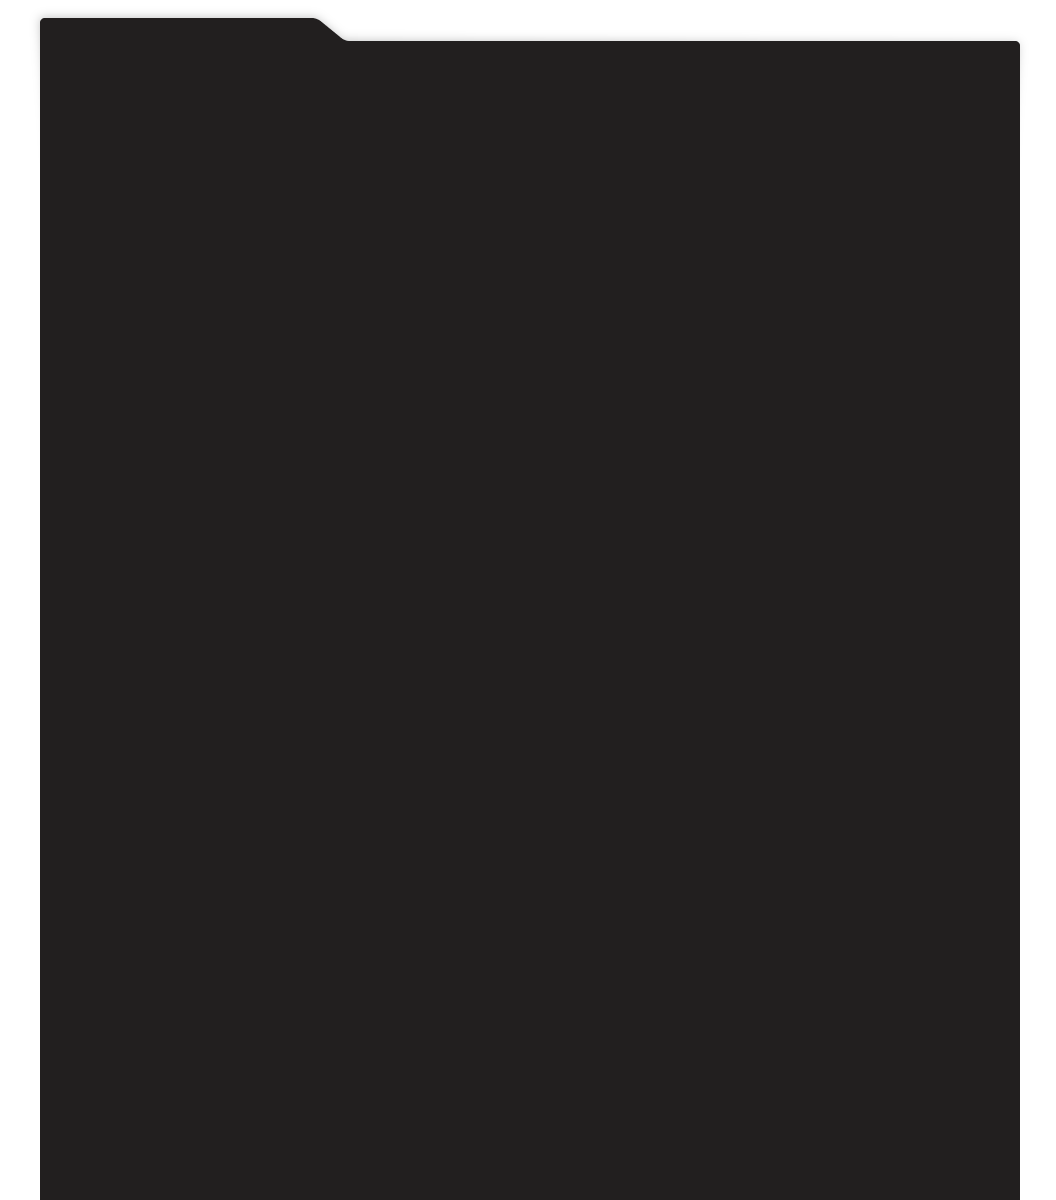
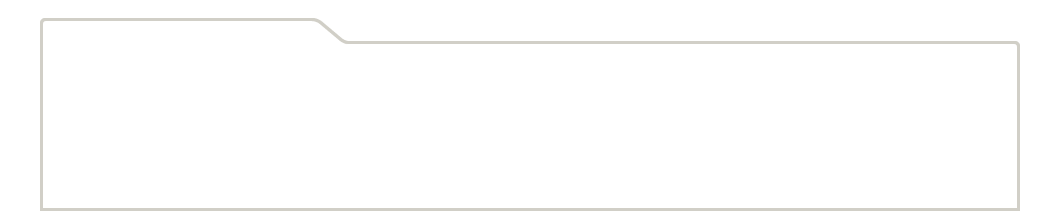
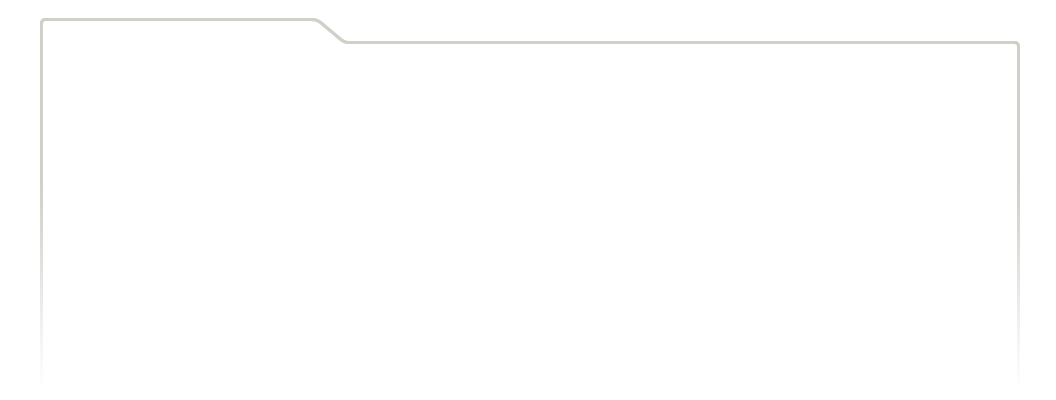
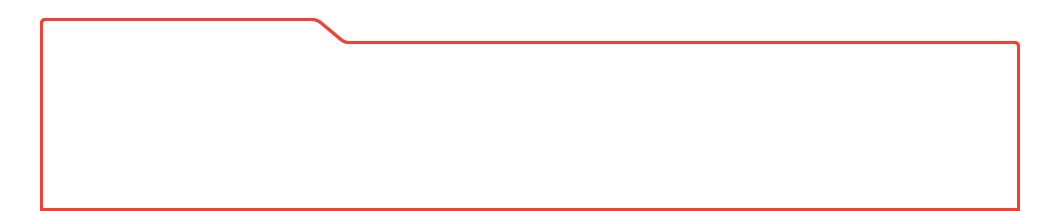
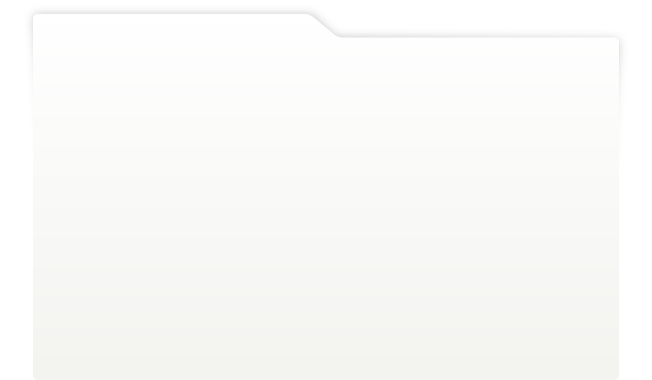
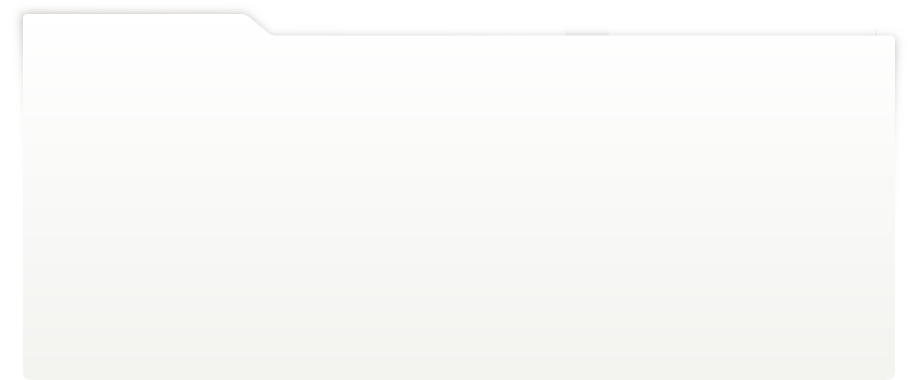
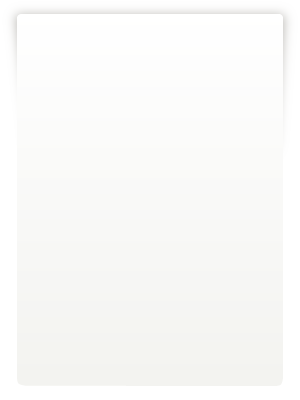
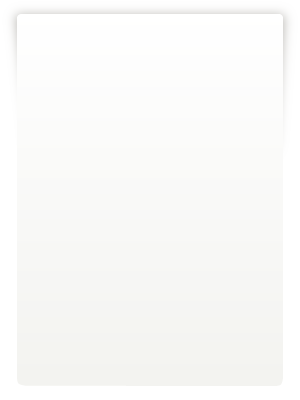
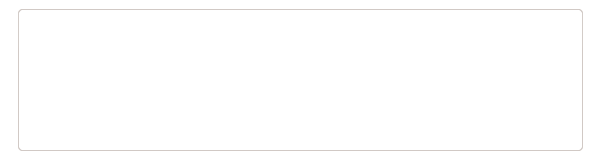
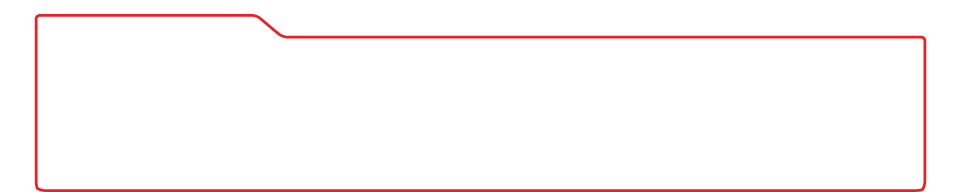
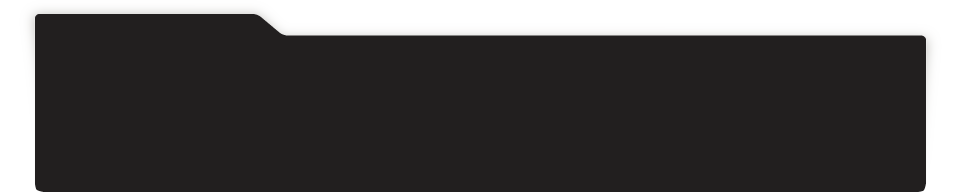
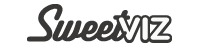
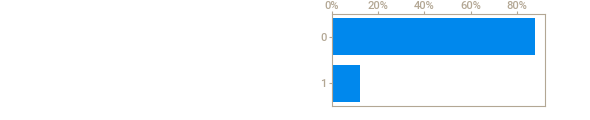
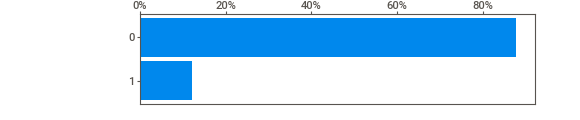
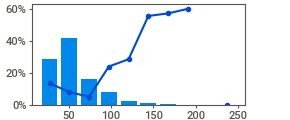
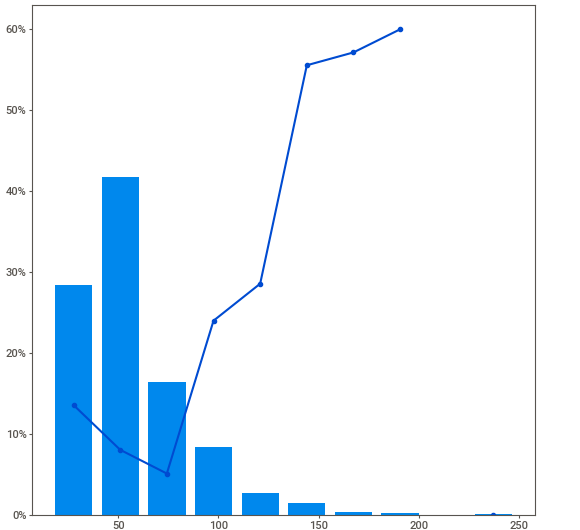
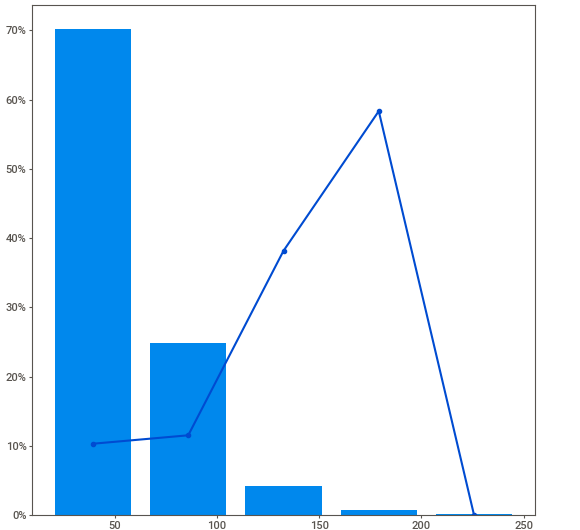
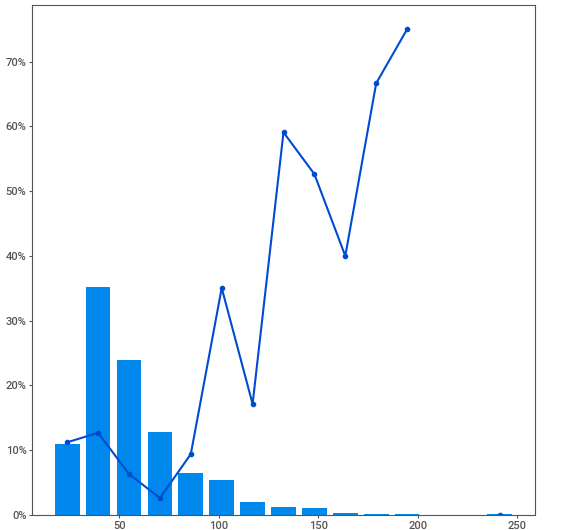
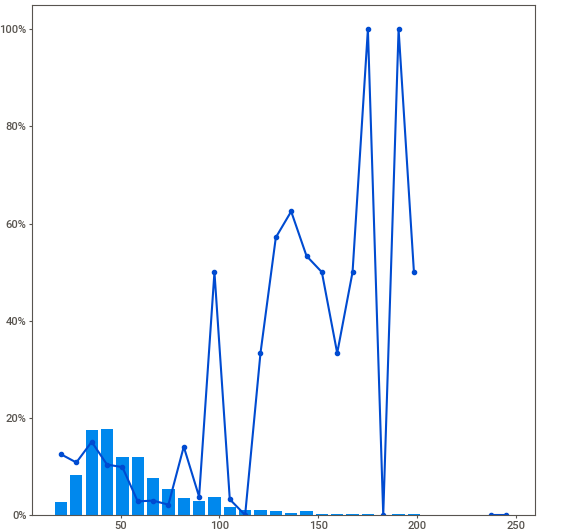
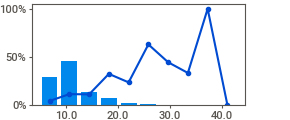
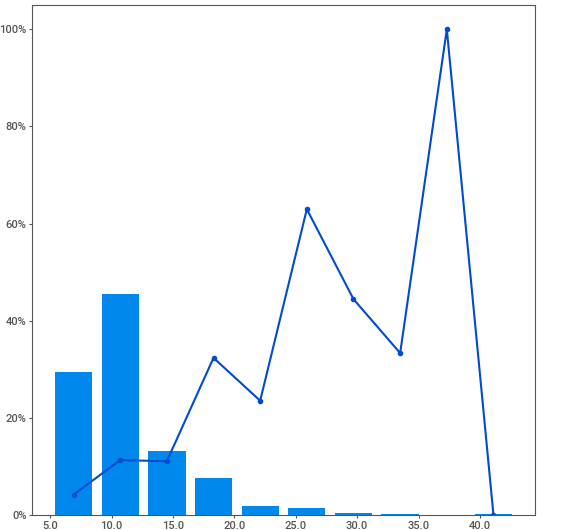
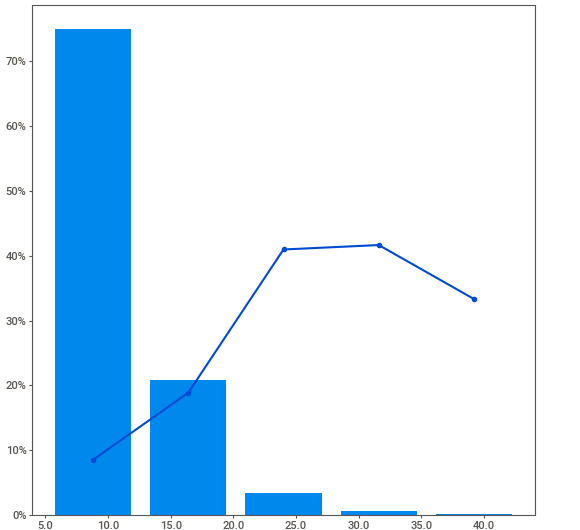
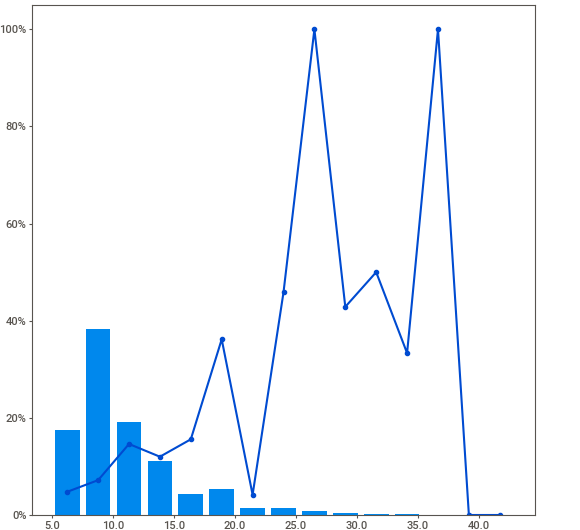
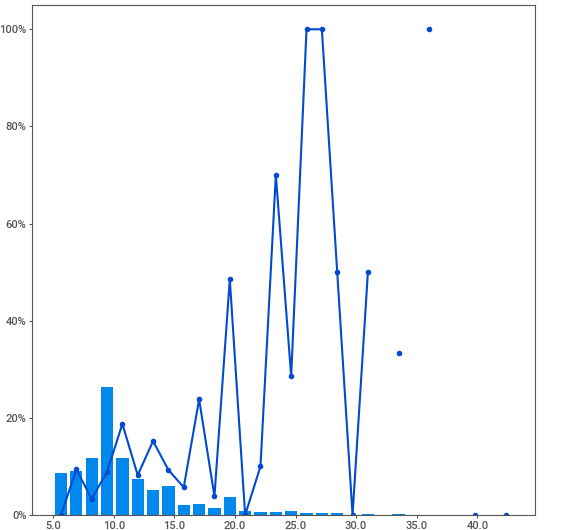
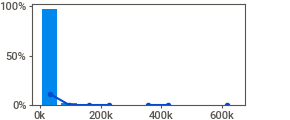
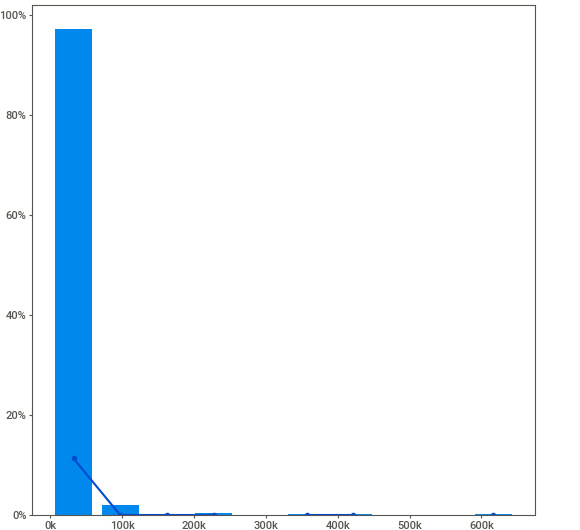
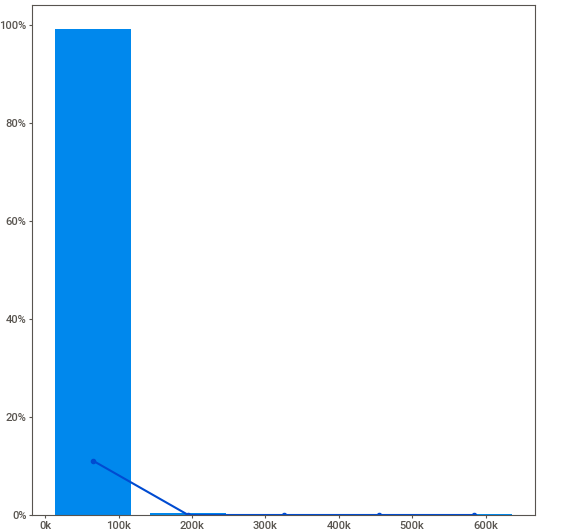
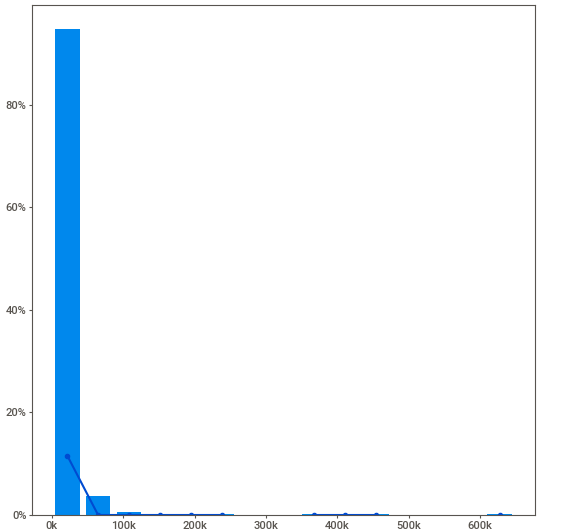
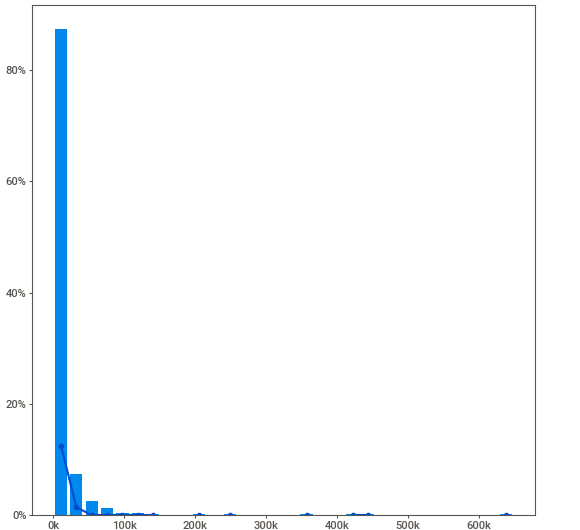
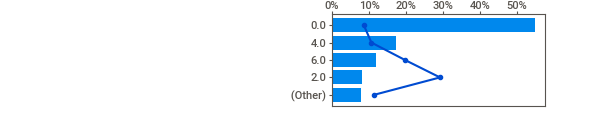
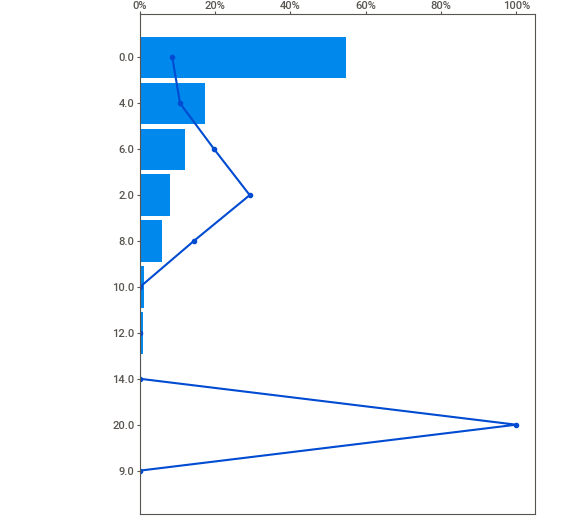
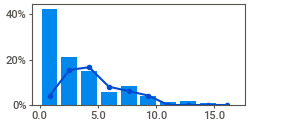
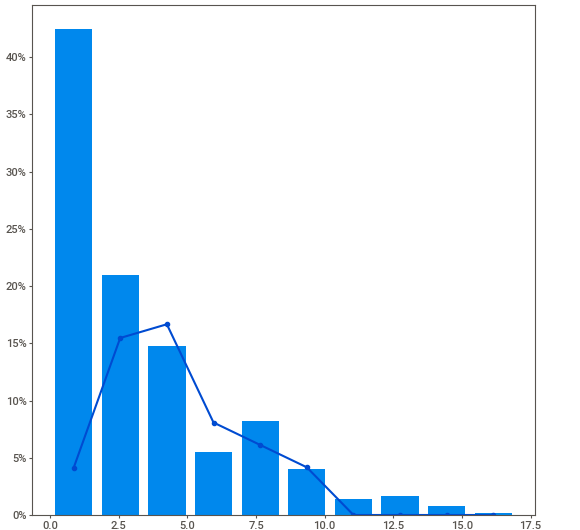
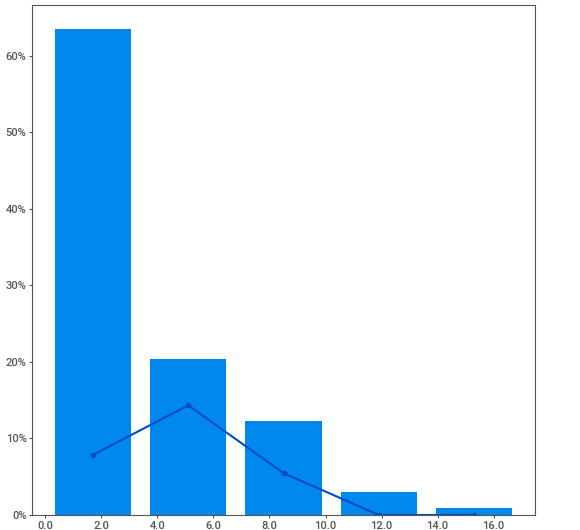
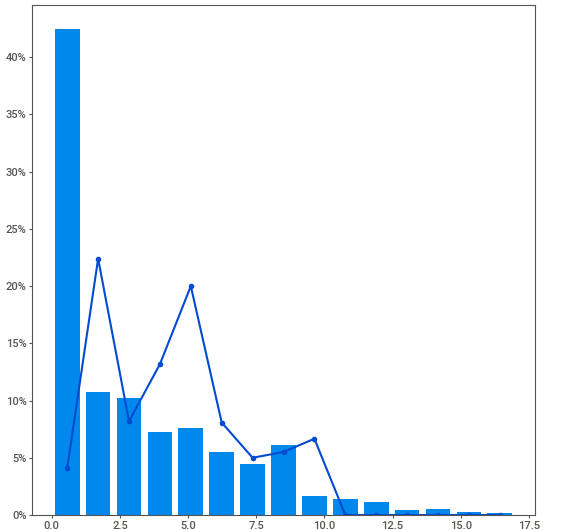
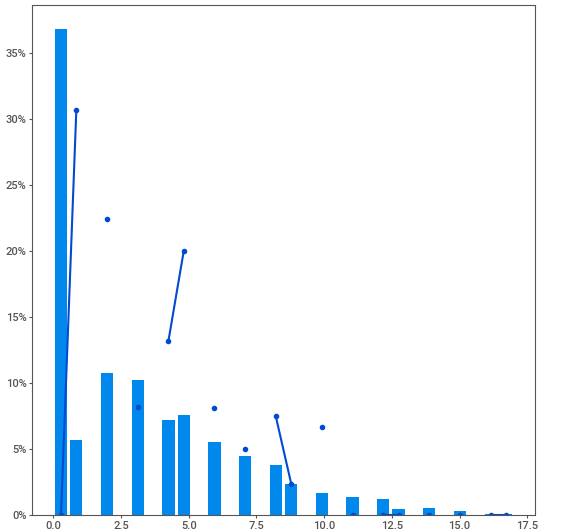
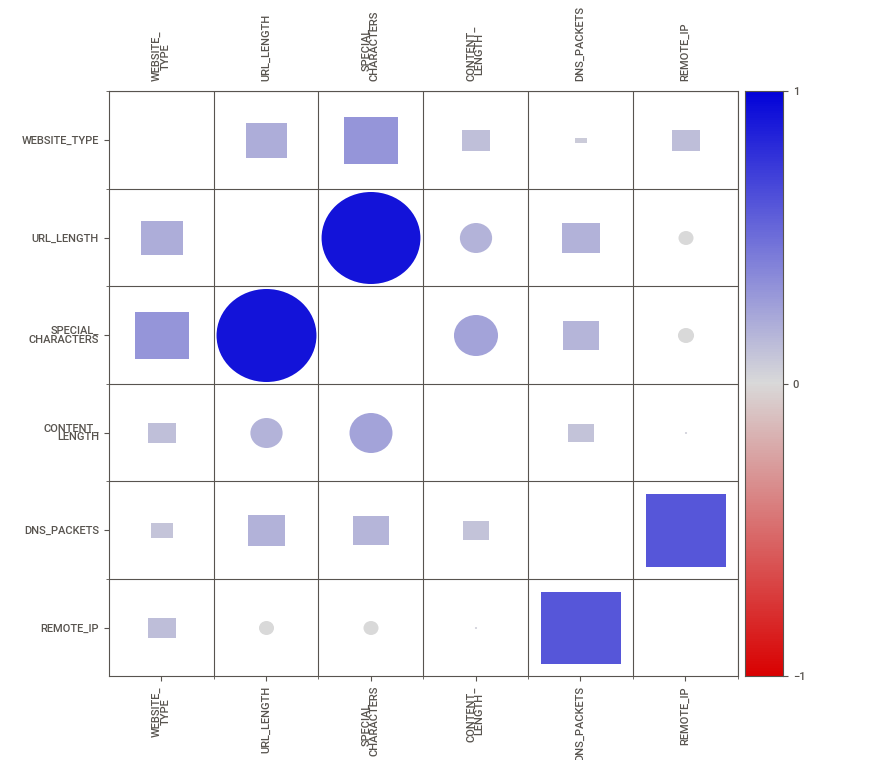
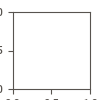

In [170]:
report.show_notebook() 

In [171]:
report2 = sweetviz.compare([df.head(50),"PHISHING_DATASET"],[df.tail(50),"PHISHING_DATASET"],target_feat="WEBSITE_TYPE")
report2.show_html(layout="vertical")

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



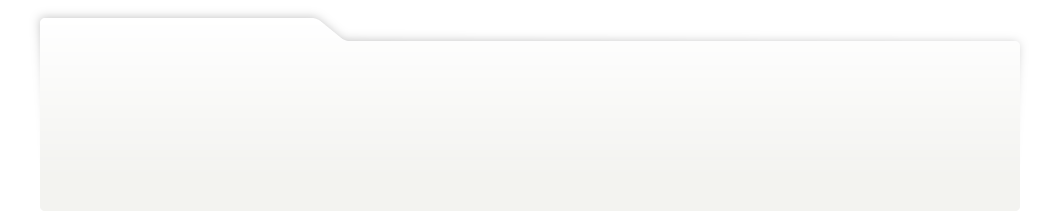
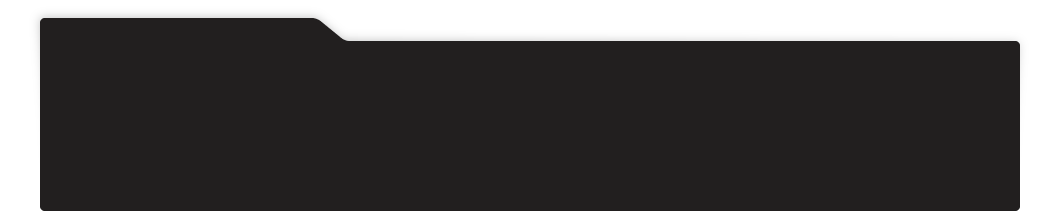
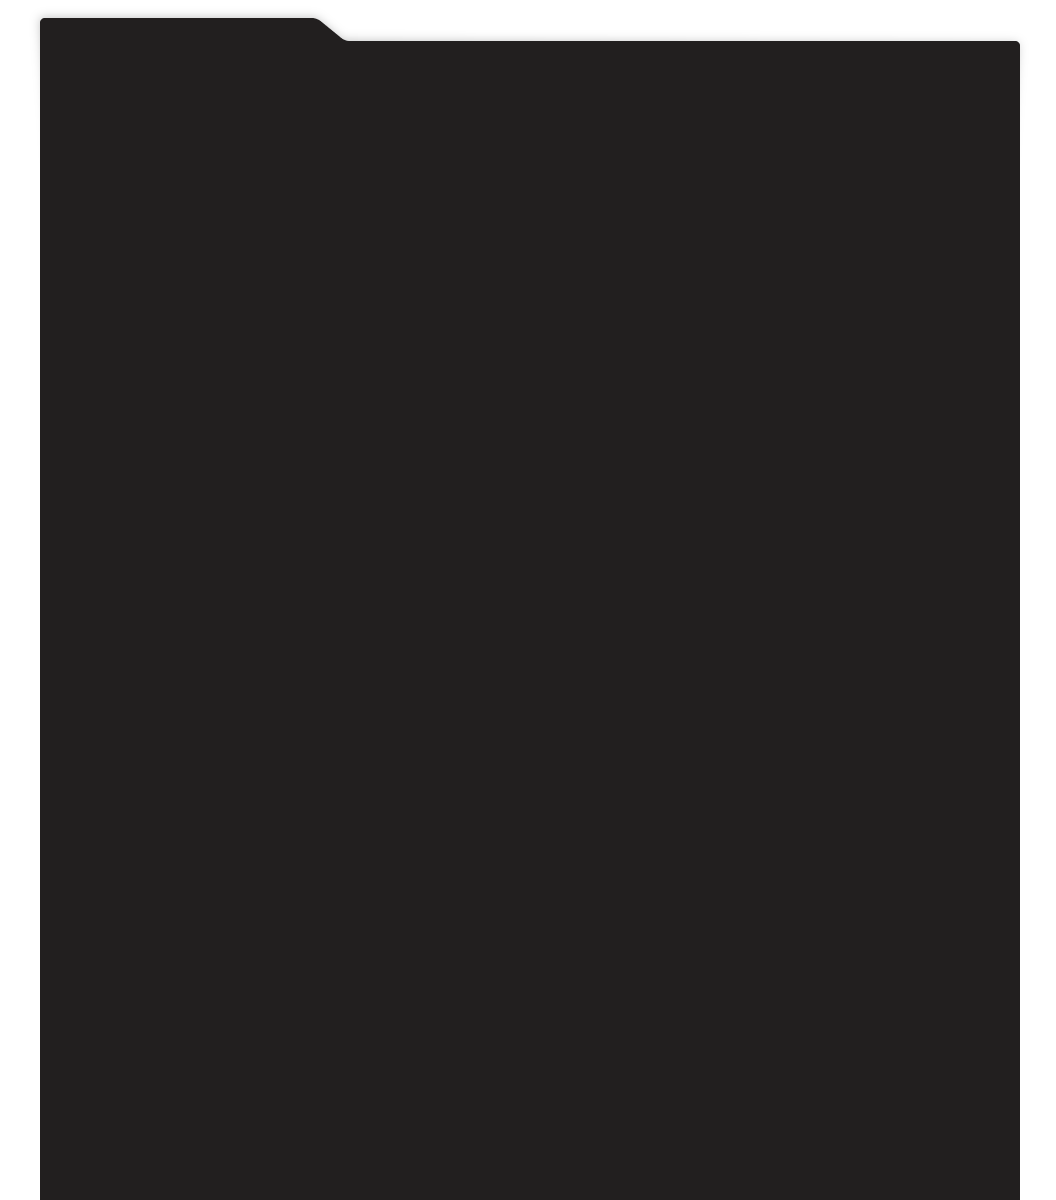
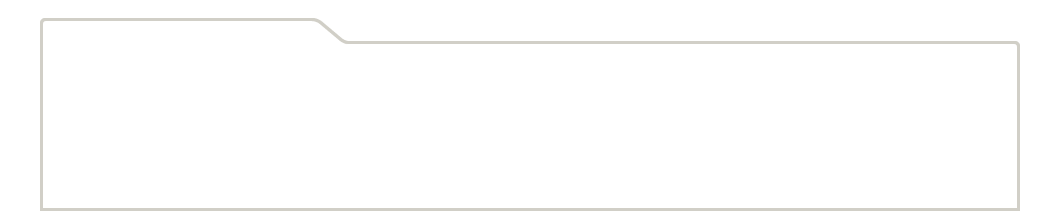
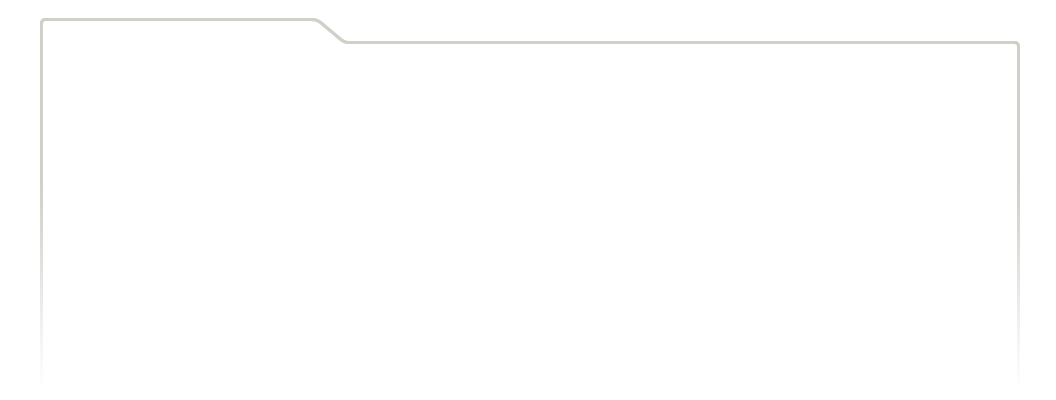
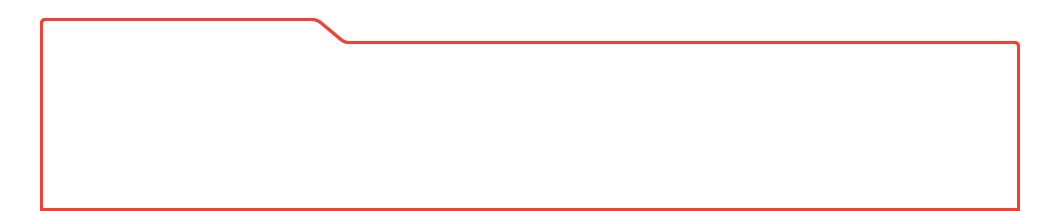
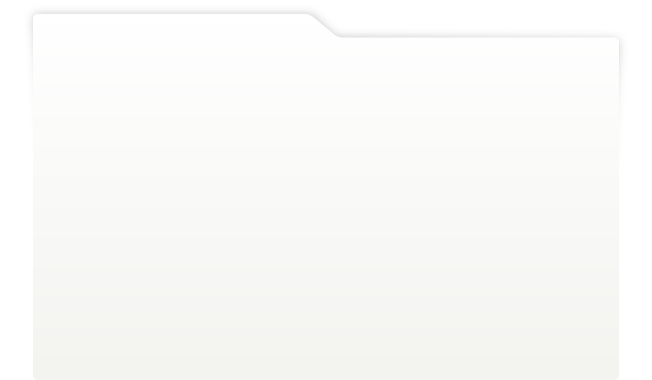
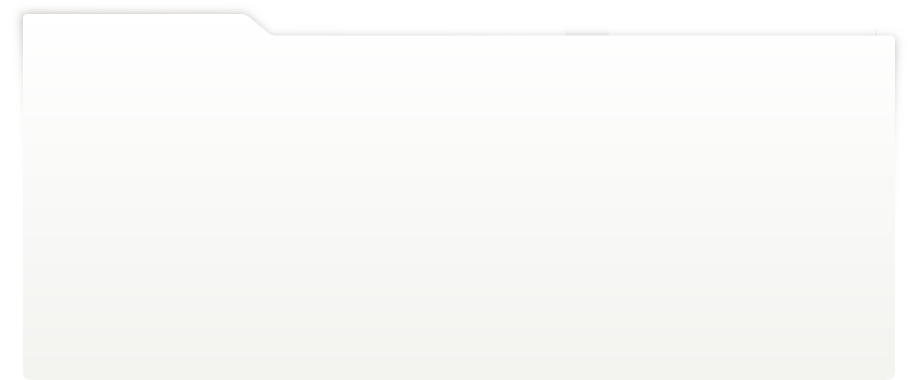
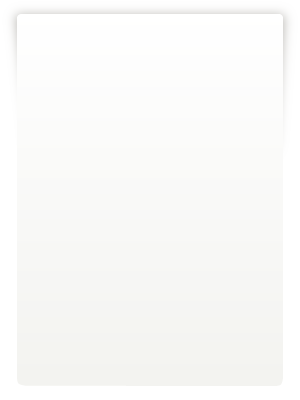
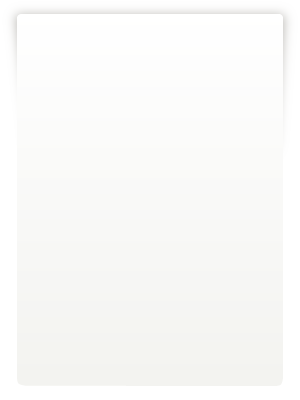
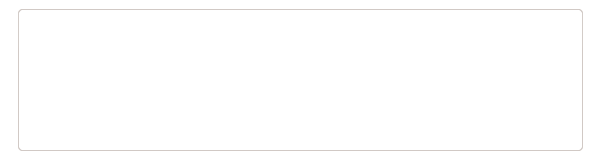
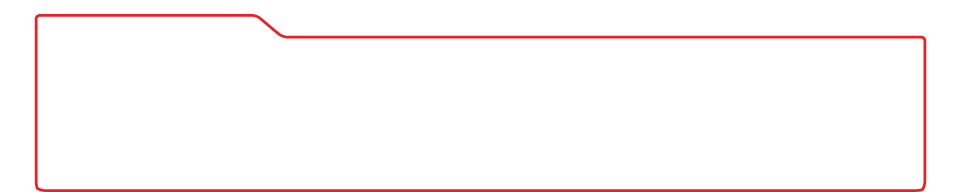
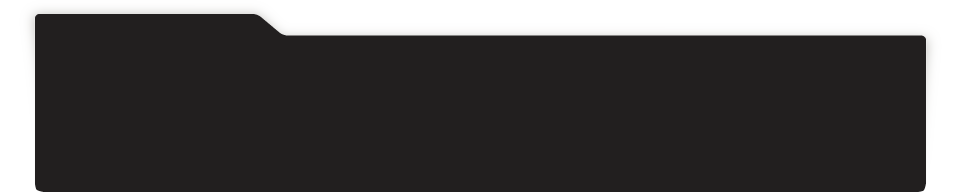
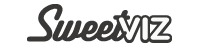
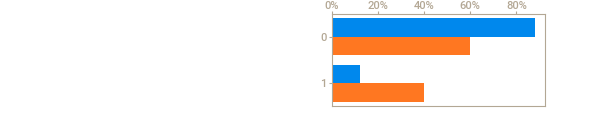
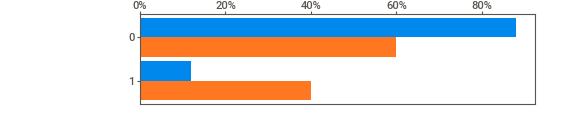
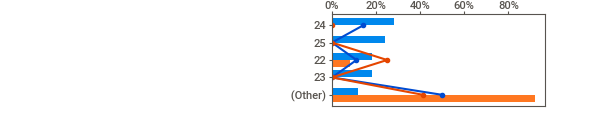
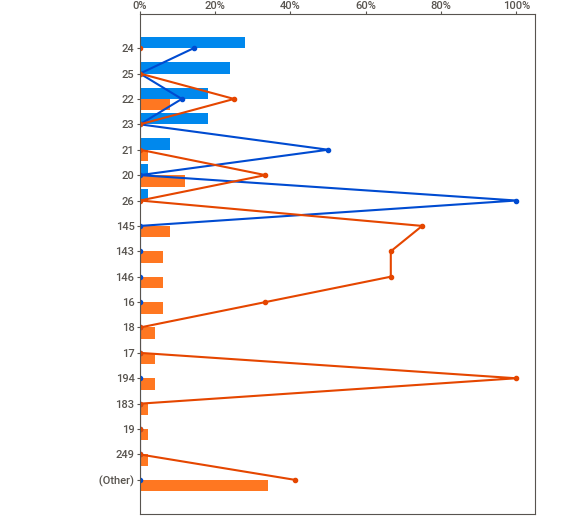
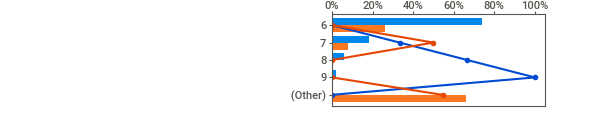
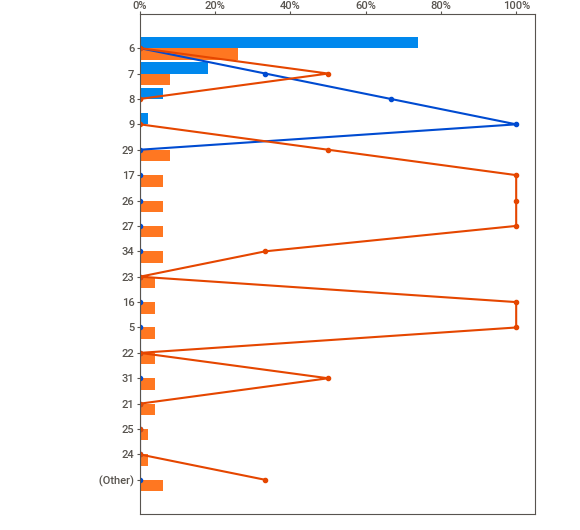
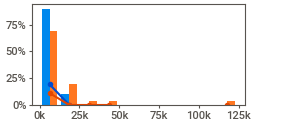
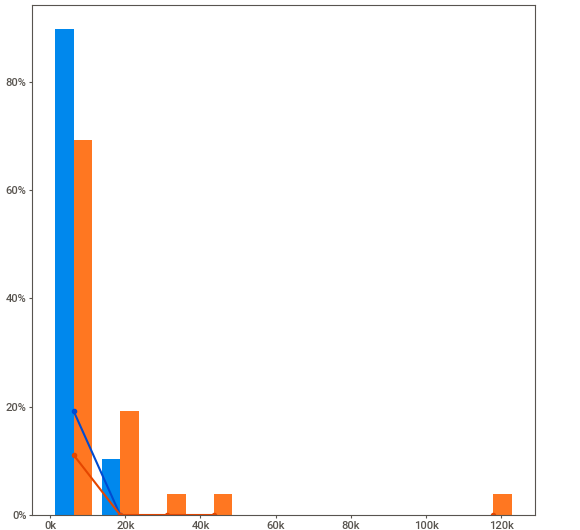
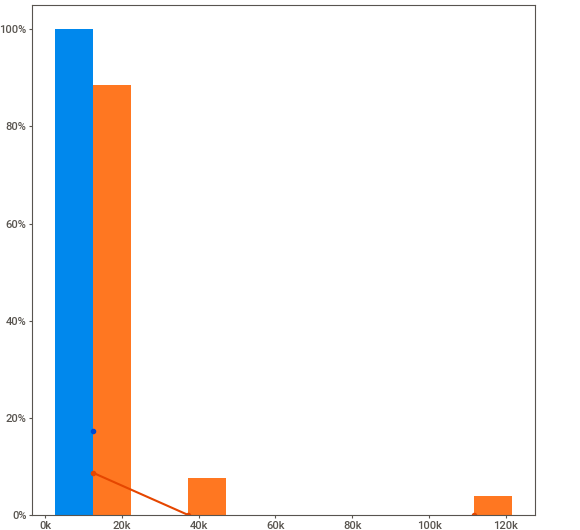
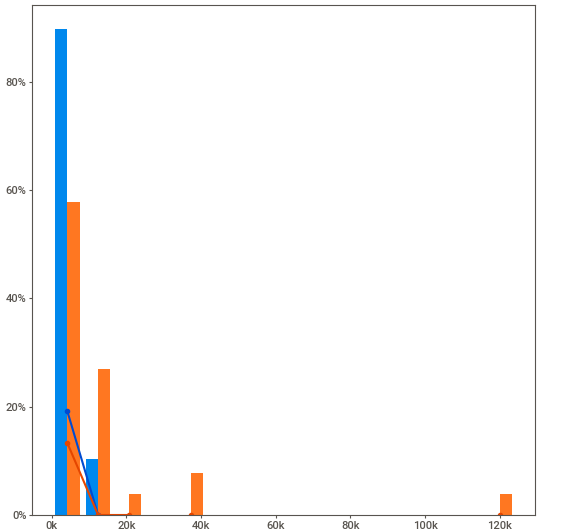
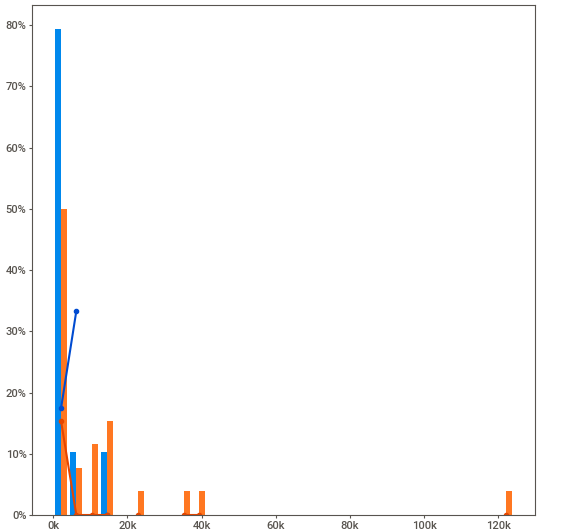
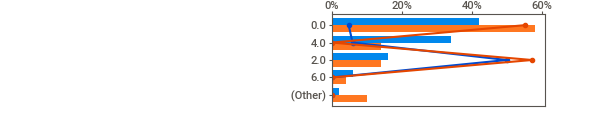
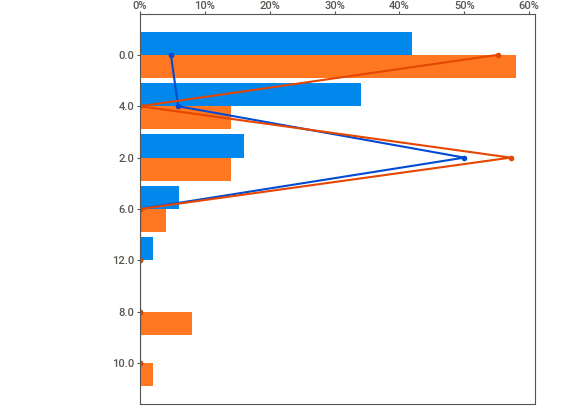
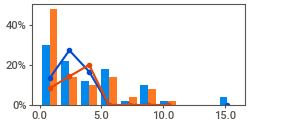
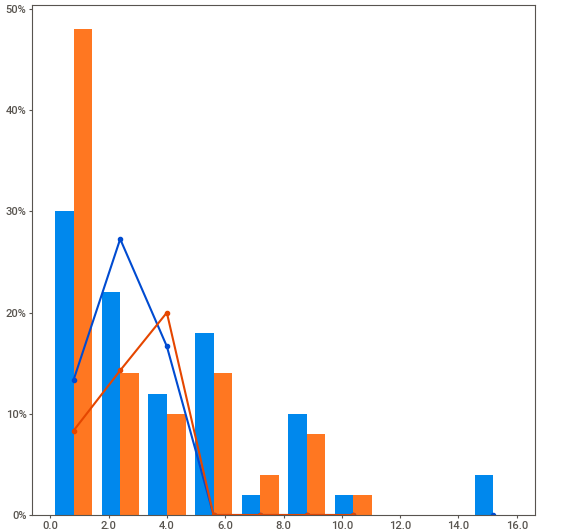
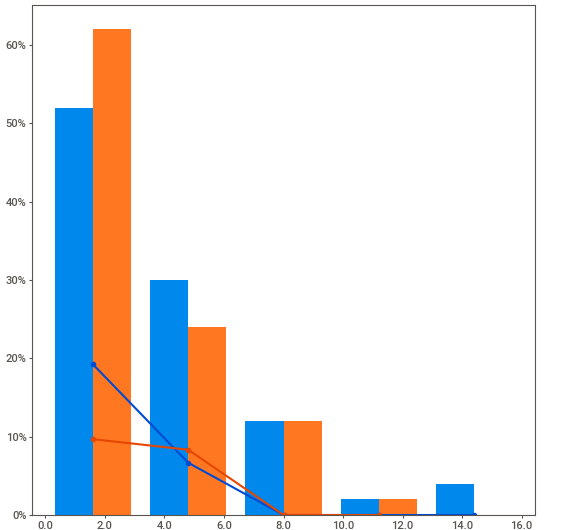
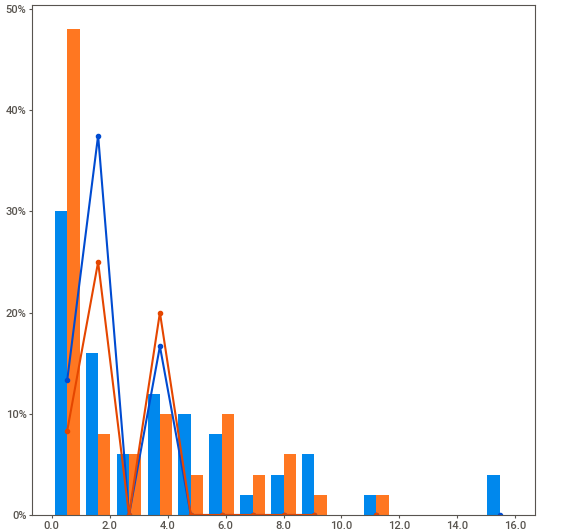
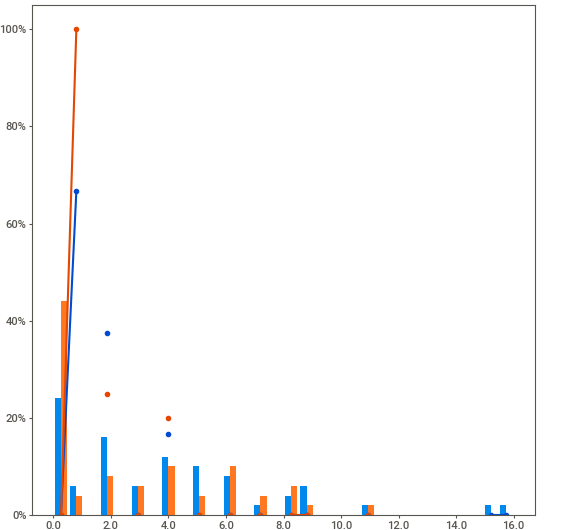
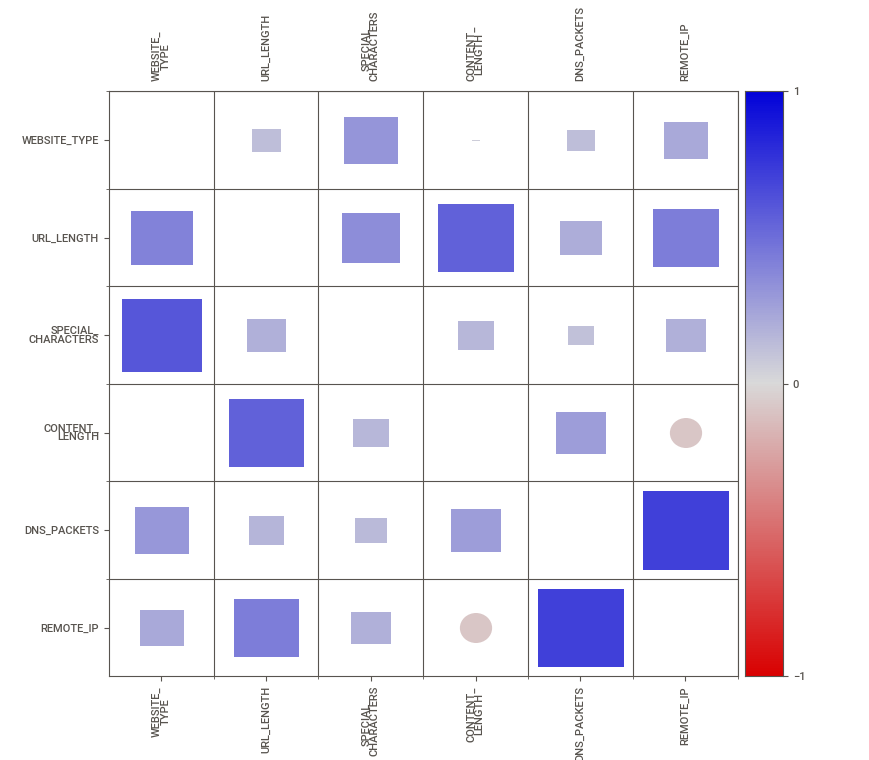
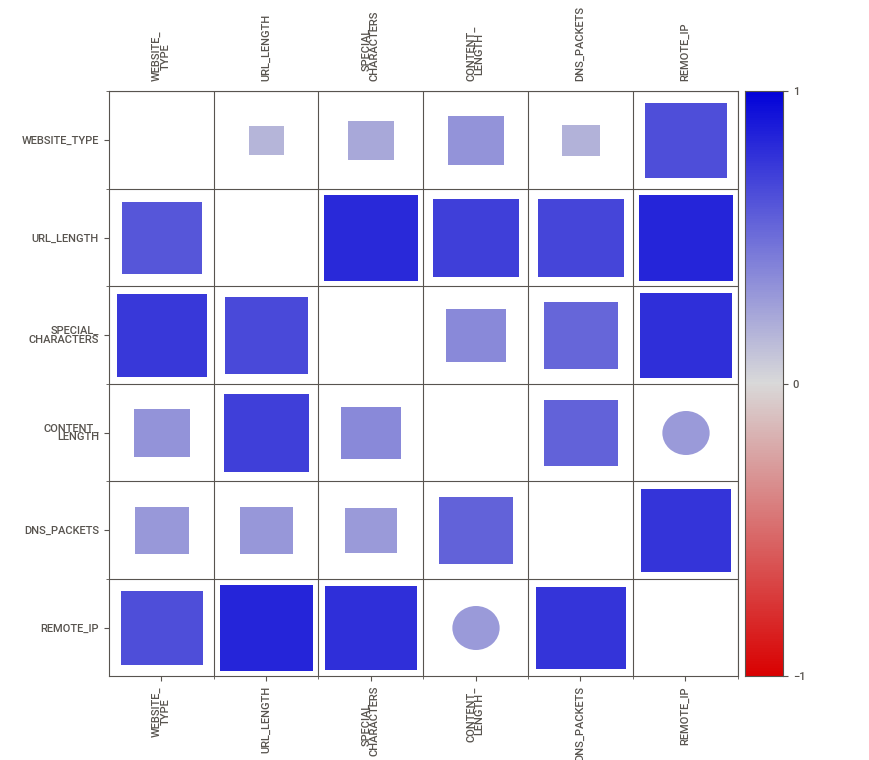

In [172]:
report2.show_notebook()

In [173]:
report = ProfileReport(df.iloc[:,0:5])

In [174]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [175]:
report.to_file("report.html",silent = False)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [176]:
report = ProfileReport(df.iloc[:,0:5],minimal=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [177]:

# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape
     


((1428, 20), (358, 20))

In [178]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

CONTENT_LENGTH  URL_LENGTH CHARACTER_SET  SPECIAL_CHARACTERS  \
0          6222.0          40         UTF-8                   7   
1          8326.0          84         utf-8                  15   
2             NaN         102         UTF-8                  12   
3          8756.0          27         UTF-8                   7   
4             NaN          43    ISO-8859-1                   9   

                   SERVER URL_IDENTIFICATION  COUNTRY   STATE  \
0                     GSE            M0_1142  America      CA   
1                  Apache            M0_1394  America   Texas   
2    nginx/1.4.6 (Ubuntu)            M0_1280  America      CA   
3  Apache/2.2.22 (Debian)              A0_67       GB    WC1N   
4        cloudflare-nginx              M0_43   Canada  Quebec   

  REGISTRATION_DATE UPDATED_DATE  ...  PORTS_DETECTED  REMOTE_IP  \
0         31-Jul-00    29-Jun-16  ...               0          0   
1         23-Nov-98    24-Apr-15  ...               0          0   
2         14-Dec-95    06-Dec-16  ...               0          0   
3         16-Jun-00    16-Feb-16  ...               0          3   
4         10-Apr-02    09-Jun-16  ...               4          7   

   BYTES_TRANSFERRED  REMOTE_APP_PACKETS  SOURCE_APP_PACKETS  \
0                  0                   0                   0   
1                  0                   0                   0   
2                  0                   0                   0   
3               4207                  45                  44   
4               1511                  21                  22   

   REMOTE_APP_BYTES  SOURCE_APP_BYTES  IP_PACKETS  DNS_PACKETS  WEBSITE_TYPE  
0                 0                 0           0          0.0             0  
1                 0                 0           0          0.0             0  
2                 0                 0           0          0.0             0  
3              4679             39662          44          6.0             1  
4              1663             14430          22          2.0             0  

[5 rows x 21 columns]

In [179]:
dummies = pd.get_dummies(data[["CONTENT_LENGTH" , "CHARACTER_SET", "SERVER", "URL_IDENTIFICATION", "COUNTRY", "STATE", "REGISTRATION_DATE", "UPDATED_DATE"]])
dummies

CONTENT_LENGTH  CHARACTER_SET_ISO-8859  CHARACTER_SET_ISO-8859-1  \
0             6222.0                       0                         0   
1             8326.0                       0                         0   
2                NaN                       0                         0   
3             8756.0                       0                         0   
4                NaN                       0                         1   
...              ...                     ...                       ...   
1781         30193.0                       0                         0   
1782             NaN                       0                         0   
1783             NaN                       0                         1   
1784          7503.0                       0                         0   
1785             NaN                       0                         0   

      CHARACTER_SET_UTF-8  CHARACTER_SET_iso-8859-1  CHARACTER_SET_us-ascii  \
0                       1                         0                       0   
1                       0                         0                       0   
2                       1                         0                       0   
3                       1                         0                       0   
4                       0                         0                       0   
...                   ...                       ...                     ...   
1781                    0                         0                       0   
1782                    1                         0                       0   
1783                    0                         0                       0   
1784                    1                         0                       0   
1785                    1                         0                       0   

      CHARACTER_SET_utf-8  CHARACTER_SET_windows-1251  \
0                       0                           0   
1                       1                           0   
2                       0                           0   
3                       0                           0   
4                       0                           0   
...                   ...                         ...   
1781                    1                           0   
1782                    0                           0   
1783                    0                           0   
1784                    0                           0   
1785                    0                           0   

      CHARACTER_SET_windows-1252  SERVER_.V01 Apache  ...  \
0                              0                   0  ...   
1                              0                   0  ...   
2                              0                   0  ...   
3                              0                   0  ...   
4                              0                   0  ...   
...                          ...                 ...  ...   
1781                           0                   0  ...   
1782                           0                   0  ...   
1783                           0                   0  ...   
1784                           0                   0  ...   
1785                           0                   0  ...   

      UPDATED_DATE_31-Dec-16  UPDATED_DATE_31-Jan-13  UPDATED_DATE_31-Jan-16  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   
...                      ...                     ...                     ...   
1781                       0                       0                       0   
1782                       0                       0                       0   
1783                       0  

In [180]:
x=df.loc[:,:].values
x

array([[ 21.,   7., 957.,   4.,   1.,   1.],
       [ 21.,   7., 686.,   2.,   2.,   1.],
       [ 21.,   6., 324.,   0.,   3.,   0.],
       ...,
       [ 22.,   6.,  nan,   4.,   6.,   0.],
       [ 22.,   6., 318.,   0.,   6.,   0.],
       [ 22.,   6., 224.,   0.,   2.,   0.]])

In [181]:
y=df.iloc[:,3].values
y

array([4., 2., 0., ..., 4., 0., 0.])

In [182]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder_x=LabelEncoder()
x[:,0]=label_encoder_x.fit_transform(x[:,0])
onehot_encoder=OneHotEncoder()
x=onehot_encoder.fit_transform(x).toarray()
print(x)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [183]:
label_encoder_y=LabelEncoder()
y=label_encoder_y.fit_transform(y)
print(y)

[2 1 0 ... 2 0 0]


In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [185]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[-0.03745029 -0.03745029 -0.03745029 ... -0.02647208  0.37614733
  -0.37614733]
 [-0.03745029 -0.03745029 -0.03745029 ... -0.02647208  0.37614733
  -0.37614733]
 [-0.03745029 -0.03745029 -0.03745029 ... -0.02647208 -2.65853279
   2.65853279]
 ...
 [-0.03745029 -0.03745029 -0.03745029 ... -0.02647208  0.37614733
  -0.37614733]
 [-0.03745029 -0.03745029 -0.03745029 ... -0.02647208  0.37614733
  -0.37614733]
 [-0.03745029 -0.03745029 -0.03745029 ... -0.02647208  0.37614733
  -0.37614733]]


In [186]:
print(x_test)

[[-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]
 [-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]
 [-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]
 ...
 [-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]
 [-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]
 [-0.05292561  0.          0.         ...  0.          0.35466345
  -0.35466345]]


In [187]:
# Creating holders to store the model performance results
# Creating holders to store the model performance results

# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [188]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["CONTENT_LENGTH" , "CHARACTER_SET", "SERVER", "URL_IDENTIFICATION", "COUNTRY", "STATE", "REGISTRATION_DATE", "UPDATED_DATE"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot,
                                 categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1786x4315 sparse matrix of type '<class 'numpy.float64'>'
	with 28709 stored elements in Compressed Sparse Row format>

In [189]:
pd.DataFrame(transformed_X)

0
0       (0, 148)\t1.0\n  (0, 639)\t1.0\n  (0, 722)\t...
1       (0, 139)\t1.0\n  (0, 641)\t1.0\n  (0, 846)\t...
2       (0, 73)\t1.0\n  (0, 642)\t1.0\n  (0, 762)\t1...
3       (0, 464)\t1.0\n  (0, 643)\t1.0\n  (0, 846)\t...
4       (0, 70)\t1.0\n  (0, 641)\t1.0\n  (0, 846)\t1...
...                                                 ...
1781    (0, 464)\t1.0\n  (0, 643)\t1.0\n  (0, 846)\t...
1782    (0, 73)\t1.0\n  (0, 642)\t1.0\n  (0, 762)\t1...
1783    (0, 637)\t1.0\n  (0, 643)\t1.0\n  (0, 880)\t...
1784    (0, 70)\t1.0\n  (0, 641)\t1.0\n  (0, 846)\t1...
1785    (0, 40)\t1.0\n  (0, 641)\t1.0\n  (0, 682)\t1...

[1786 rows x 1 columns]

In [195]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics
     

In [196]:

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 18)                378       
                                                                 
 dense_5 (Dense)             (None, 20)                380       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
Total params: 2,018
Trainable params: 2,018
Non-trainable par

In [150]:
random = data.COUNTRY.unique()
# random = random.dropna()
df = pd.DataFrame(random, columns = ['Country'])
df = df.dropna()
df = df.to_numpy()
df = df.ravel()
df.shape

(51,)

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df)
vectorizer.get_feature_names_out()
X.toarray()
# vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
# X2 = vectorizer2.fit_transform(df)
# vectorizer2.get_feature_names_out()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [202]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

Empty DataFrame
Columns: [ML Model, Train Accuracy, Test Accuracy]
Index: []

In [203]:

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

Empty DataFrame
Columns: [ML Model, Train Accuracy, Test Accuracy]
Index: []

In [ ]:
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [213]:
from sklearn.linear_model import LogisticRegression

In [209]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)